# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Create a new dataframe from your CSV

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
print(df.info())

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB
None
(23486, 10)


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

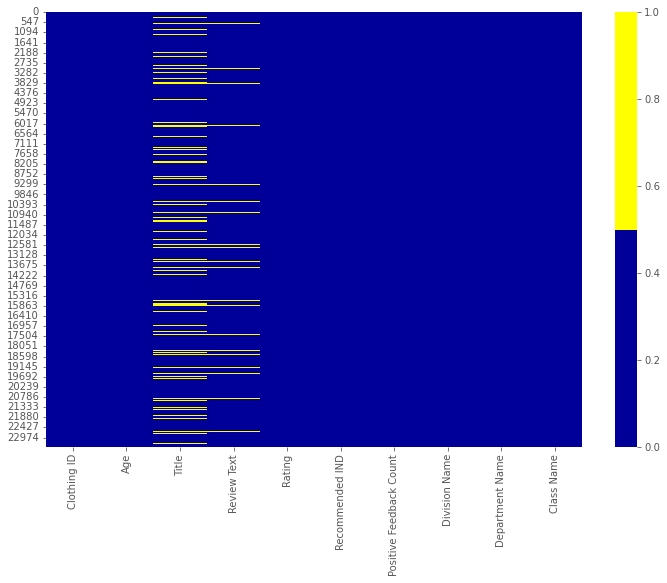

In [5]:
# Plot a heatmap of any missing data
colors = ['#000099', '#ffff00']
cols=df.columns

sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [6]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


In [7]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing>0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

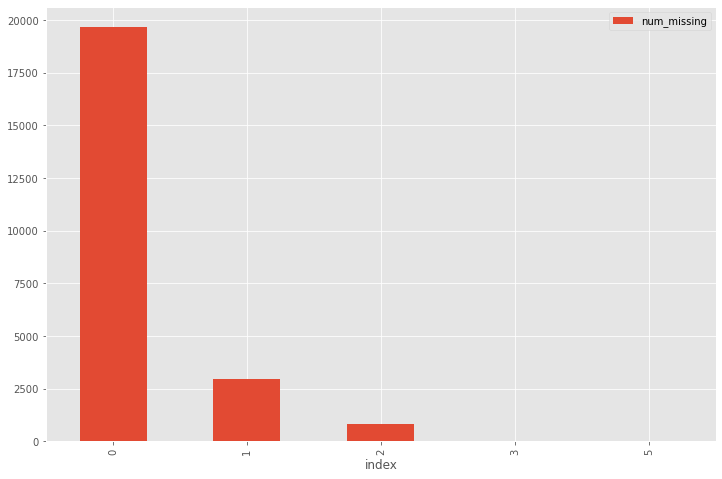

In [8]:
ismissing_cols=[col for col in df.columns if 'ismissing' in col]
df['num_missing']=df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

<AxesSubplot:>

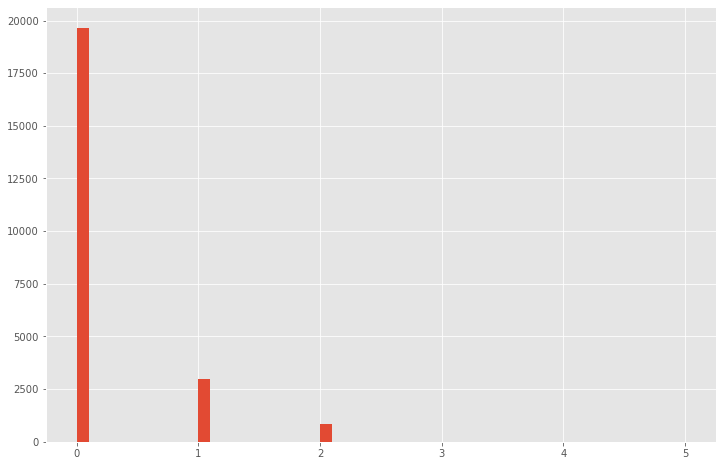

In [9]:
missing_by_row = df.isna().sum(axis='columns')

missing_by_row.hist(bins=50)

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [10]:
# Handle any missing data in your dataframe.
num_missing=df.isna().sum()

num_missing

Clothing ID                     0
Age                             0
Title                        3810
Review Text                   845
Rating                          0
Recommended IND                 0
Positive Feedback Count         0
Division Name                  14
Department Name                14
Class Name                     14
Title_ismissing                 0
Review Text_ismissing           0
Division Name_ismissing         0
Department Name_ismissing       0
Class Name_ismissing            0
num_missing                     0
dtype: int64

In [11]:
division_drop=df[df['Division Name'].isna()]

division_drop

Clothing ID  Age                                  Title  \
9444            72   25                   My favorite socks!!!   
13767          492   23                               So soft!   
13768          492   49                        Wardrobe staple   
13787          492   48                                    NaN   
16216          152   36                          Warm and cozy   
16221          152   37                                  Love!   
16223          152   39                        "long and warm"   
18626          184   34                  Nubby footless tights   
18671          184   54                          New workhorse   
20088          772   50                      Comfy sweatshirt!   
21532          665   43                           So worth it!   
22997          136   47  Charcoal, pale gray, a bit of silver!   
23006          136   33                        Cute itsy socks   
23011          136   36                            Super socks   

                                             Review Text  Rating  \
9444   I never write reviews, but these socks are so ...       5   
13767  I just love this hoodie! it is so soft and com...       5   
13768  Love this hoodie. so soft and goes with everyt...       5   
13787                                                NaN       5   
16216  Just what i was looking for. soft, cozy and warm.       5   
16221  I am loving these. they are quite long but are...       5   
16223  These leg warmers are perfect for me. they are...       5   
18626  These are amazing quality. i agree, size up to...       5   
18671  These tights are amazing! if i care for them w...       5   
20088  This sweatshirt is really nice!  it's oversize...       5   
21532  Got these on sale...absolutely love eberjey! f...       5   
22997  These socks are soft and comfortable, and they...       5   
23006  Love polkadots, love sparkle. these little soc...       5   
23011  I love these little socks ? and the dots spark...       5   

       Recommended IND  Positive Feedback Count Division Name Department Name  \
9444                 1                        0           NaN             NaN   
13767                1                        1           NaN             NaN   
13768                1                        0           NaN             NaN   
13787                1                        0           NaN             NaN   
16216                1                        0           NaN             NaN   
16221                1                        0           NaN             NaN   
16223                1                        0           NaN             NaN   
18626                1                        5           NaN             NaN   
18671                1                        0           NaN             NaN   
20088                1                        0           NaN             NaN   
21532                1                        0           NaN             NaN   
22997                1                        1           NaN             NaN   
23006                1                        0           NaN             NaN   
23011                1                        0           NaN             NaN   

      Class Name  Title_ismissing  Review Text_ismissing  \
9444         NaN            False                  False   
13767        NaN            False                  False   
13768        NaN            False                  False   
13787        NaN             True                   True   
16216        NaN            False                  False   
16221        NaN            False                  False   
16223        NaN            False                  False   
18626        NaN            False                  False   
18671        NaN            False                  False   
20088        NaN            False                  False   
21532        NaN            False                  False   
22997        NaN            False                  False   

In [12]:
df_copy=df.copy()

In [13]:
#df_copy_drop=df_copy[missing_by_row>4]

#df_copy=df_copy.drop(df[missing_by_row>4])

#df_copy_dropped= df_copy.drop(df['Division Name'].isna(), axis=0)

#review_missing=df[df[""]=True].index
#review_missing


#review_missing=df[df['Review Text'].isna()]
#review_missing

#division_missing=df[df['num_missing'] > 3].index

#df_copy=df_copy.drop(division_missing, axis=0)

#df_copy.shape
to_drop=df[df['Division Name'].isna()].index

In [14]:
df=df.drop(to_drop, axis=0)

In [15]:
df.shape

(23472, 16)

In [16]:
empty_review= df[df['Review Text'].isna()]

empty_review.head()

Clothing ID  Age Title Review Text  Rating  Recommended IND  \
92           861   23   NaN         NaN       5                1   
93          1081   31   NaN         NaN       5                1   
98          1133   50   NaN         NaN       5                1   
135          861   35   NaN         NaN       4                1   
142         1126   35   NaN         NaN       5                1   

     Positive Feedback Count   Division Name Department Name Class Name  \
92                         0  General Petite            Tops      Knits   
93                         0         General         Dresses    Dresses   
98                         0         General         Jackets  Outerwear   
135                        0  General Petite            Tops      Knits   
142                        0         General         Jackets  Outerwear   

     Title_ismissing  Review Text_ismissing  Division Name_ismissing  \
92              True                   True                    False   
93              True                   True                    False   
98              True                   True                    False   
135             True                   True                    False   
142             True                   True                    False   

     Department Name_ismissing  Class Name_ismissing  num_missing  
92                       False                 False            2  
93                       False                 False            2  
98                       False                 False            2  
135                      False                 False            2  
142                      False                 False            2

In [17]:
#df_copy.dropna(subset='Division Name')
df.columns


Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing', 'num_missing'],
      dtype='object')

In [18]:
df['Review Text']=df['Review Text'].fillna('_MISSING_')
df['Title']=df['Title'].fillna('_MISSING_')
#df['Review Text'].head(20)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Clothing ID                23472 non-null  int64 
 1   Age                        23472 non-null  int64 
 2   Title                      23472 non-null  object
 3   Review Text                23472 non-null  object
 4   Rating                     23472 non-null  int64 
 5   Recommended IND            23472 non-null  int64 
 6   Positive Feedback Count    23472 non-null  int64 
 7   Division Name              23472 non-null  object
 8   Department Name            23472 non-null  object
 9   Class Name                 23472 non-null  object
 10  Title_ismissing            23472 non-null  bool  
 11  Review Text_ismissing      23472 non-null  bool  
 12  Division Name_ismissing    23472 non-null  bool  
 13  Department Name_ismissing  23472 non-null  bool  
 14  Class 

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

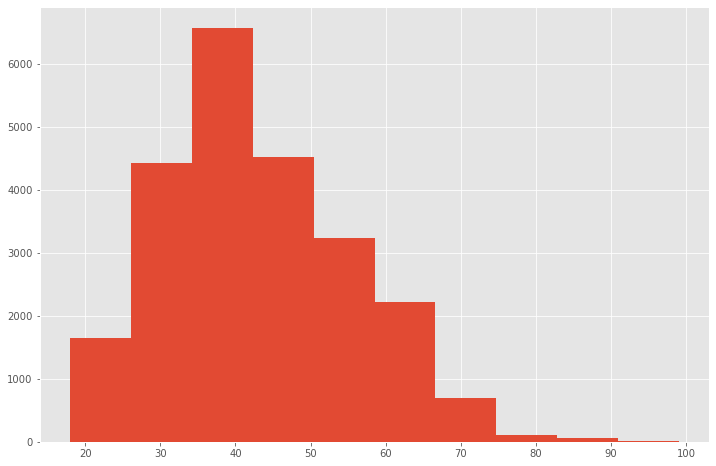

In [20]:
# Plot a histogram to see if there are any outliers.
df['Age'].hist()

<AxesSubplot:xlabel='Rating', ylabel='Positive Feedback Count'>

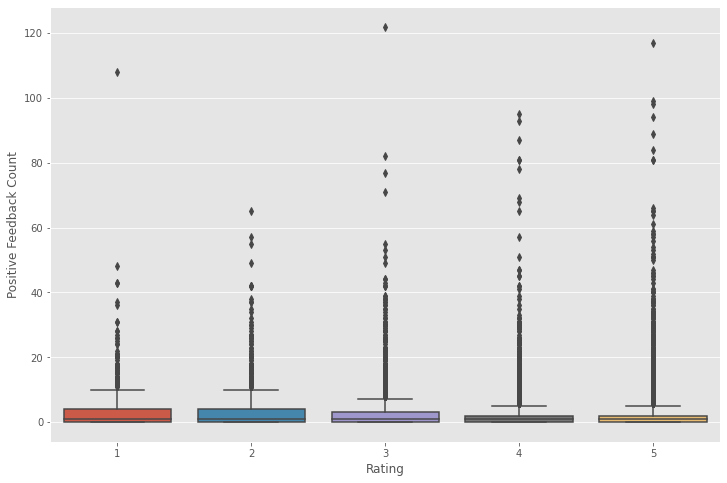

In [21]:
sns.boxplot(data=df, x='Rating', y='Positive Feedback Count')

<AxesSubplot:>

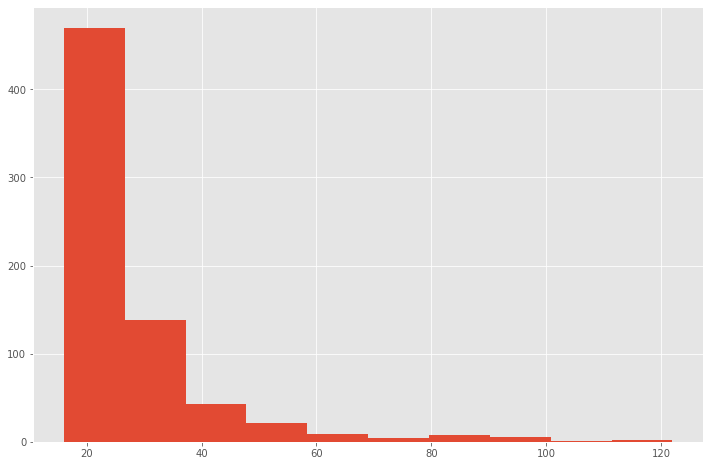

In [22]:
#df['Positive Feedback Count'>0].hist(bins=100)

feedback_count=df[df['Positive Feedback Count']>15]

feedback_count['Positive Feedback Count'].hist()

In [23]:
# Use the describe() method
print(df['Positive Feedback Count'].describe())

print(feedback_count['Positive Feedback Count'].describe())

count    23472.000000
mean         2.537151
std          5.703597
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64
count    701.000000
mean      26.703281
std       14.714341
min       16.000000
25%       18.000000
50%       22.000000
75%       29.000000
max      122.000000
Name: Positive Feedback Count, dtype: float64


In [24]:
df.Rating.describe()

count    23472.000000
mean         4.195552
std          1.110188
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [25]:
df['rating_group']=pd.cut(df['Rating'], [1,2,3,4,5])

In [26]:
#sns.boxplot(data=df, x='rating_group', y=df['Division Name'].value_counts())


<AxesSubplot:>

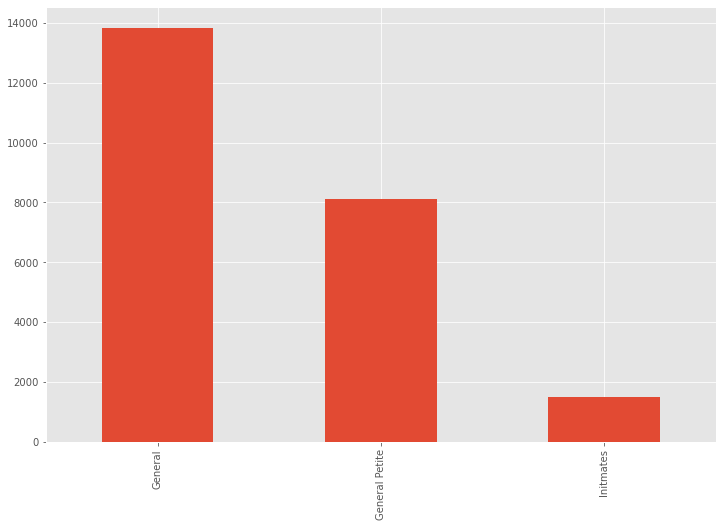

In [27]:
# Plot a bar chart
df['Division Name'].value_counts().plot(kind='bar')

<AxesSubplot:>

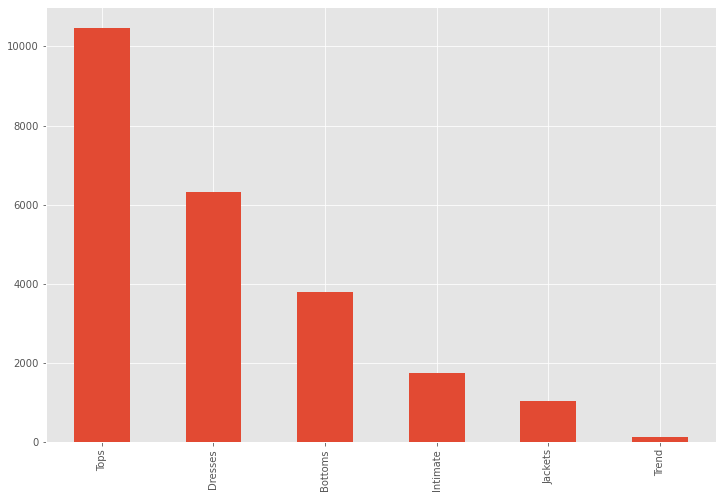

In [28]:
df['Department Name'].value_counts().plot(kind='bar')

In [29]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [30]:
df_trend=df[df['Department Name']=='Trend']

<AxesSubplot:>

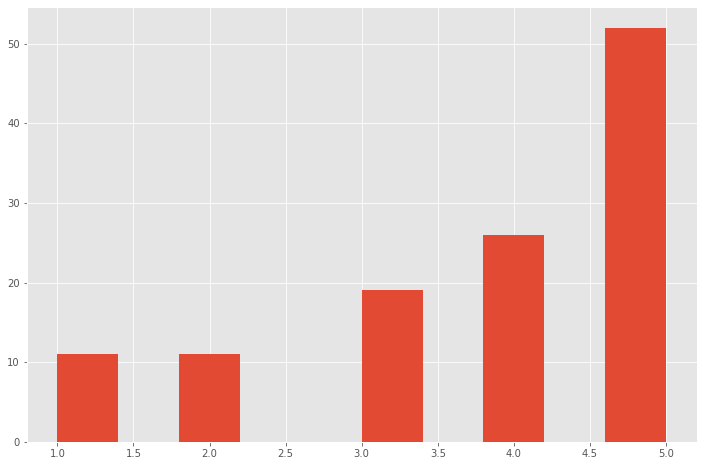

In [31]:
df_trend['Rating'].hist()

<AxesSubplot:xlabel='Division Name', ylabel='Rating'>

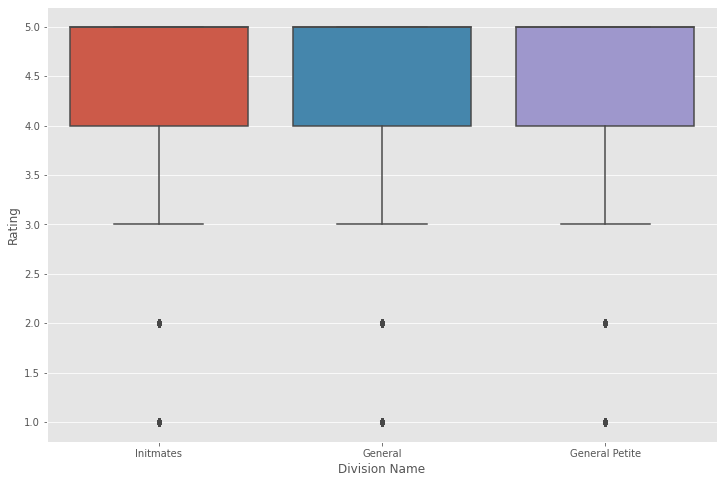

In [32]:
sns.boxplot(data=df, x='Division Name', y='Rating')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [33]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [34]:
# Look for any irrelevant data in the dataframe. How will you handle it?
#I believe all of the existing columns contribute important
# information

num_rows=len(df)

for col in df.columns:
    cnts=df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct>0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Division Name_ismissing: 100.00%
False    23472
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 100.00%
False    23472
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 100.00%
False    23472
Name: Class Name_ismissing, dtype: int64



In [35]:
# Look for duplicates. How will you handle any duplicates?

df[df.duplicated()].shape

(21, 17)

In [37]:
df.drop_duplicates()

Clothing ID  Age                                              Title  \
0              767   33                                          _MISSING_   
1             1080   34                                          _MISSING_   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  Title_ismissing  Review Text_ismissing  \
0            Intimate  Intimates             True                  False   
1             Dresses    Dresses             True                  False   
2             Dresses    Dresses            False                  False   
3             Bottoms      Pants            False                  False   
4                Tops    Blouses            False                  False   
...               ...        ...              ...                    ...   
23481         Dresses    Dresses            False                  False   
23482            Tops      Knits            False                  False   
23483         Dresses    Dresses            False                  False   
23484         Dresses    Dresses            False                  False   
23485         Dresses    Dresses            False                  False   

       Division Name_ismissing  Department Name_ismissing  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
...                        ...                        ...   
23481                    False                      False   
23482                    False                 

In [38]:
df.shape

(23472, 17)

In [39]:
#df[df.drop(columns=['Clothing ID']).duplicated()]

df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing', 'num_missing',
       'rating_group'],
      dtype='object')

In [44]:
df[df.drop(columns=['Clothing ID']).duplicated()]

Clothing ID  Age      Title Review Text  Rating  Recommended IND  \
493           1104   39  _MISSING_   _MISSING_       5                1   
1582          1201   35  _MISSING_   _MISSING_       5                1   
2954          1094   35  _MISSING_   _MISSING_       5                1   
2959          1094   30  _MISSING_   _MISSING_       5                1   
2991          1082   35  _MISSING_   _MISSING_       5                1   
...            ...  ...        ...         ...     ...              ...   
23120         1083   40  _MISSING_   _MISSING_       4                1   
23258          862   35  _MISSING_   _MISSING_       4                1   
23301          862   52  _MISSING_   _MISSING_       5                1   
23470         1104   39  _MISSING_   _MISSING_       5                1   
23480          862   35  _MISSING_   _MISSING_       5                1   

       Positive Feedback Count   Division Name Department Name Class Name  \
493                          0         General         Dresses    Dresses   
1582                         0         General         Dresses    Dresses   
2954                         0         General         Dresses    Dresses   
2959                         0         General         Dresses    Dresses   
2991                         0         General         Dresses    Dresses   
...                        ...             ...             ...        ...   
23120                        0         General         Dresses    Dresses   
23258                        0         General            Tops      Knits   
23301                        0         General            Tops      Knits   
23470                        0  General Petite         Dresses    Dresses   
23480                        0  General Petite            Tops      Knits   

       Title_ismissing  Review Text_ismissing  Division Name_ismissing  \
493               True                   True                    False   
1582              True                   True                    False   
2954              True                   True                    False   
2959              True                   True                    False   
2991              True                   True                    False   
...                ...                    ...                      ...   
23120             True                   True                    False   
23258             True                   True                    False   
23301             True                   True                    False   
23470             True                   True                    False   
23480             True                   True                    False   

       Department Name_ismissing  Class Name_ismissing  num_missing  \
493                        False                 False            2   
1582                       False                 False            2   
2954                       False                 False            2   
2959                       False                 False            2   
2991                       False                 False            2   
...                          ...                   ...          ...   
23120                      False                 False            2   
23258                      False                 False            2   
23301                      False                 False            2   
23470                      False                 False            2   
23480                      False                 False            2   

      rating_group  
493         (4, 5]  
1582        (4, 5]  
2954        (4, 5]  
2959        (4, 5]  
2991        (4, 5]  
...            ...  
23120       (3, 4]  
23258       (3, 4]  
23301       (4, 5]  
23470       (4, 5]  
23480       (4, 5]  

[232 rows x 17 columns]

In [41]:
df_clothing=df.drop(columns=['Clothing ID'])

In [47]:
df_clothing=df_clothing.drop_duplicates()

In [48]:
print(df.shape)
print(df_clothing.shape)

(23472, 17)
(23240, 16)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [49]:
# Try to convert all the strings in a column to lower or upper case. 

df['Review_lower']= df['Review Text'].str.lower()

df.head()

Clothing ID  Age                    Title  \
0          767   33                _MISSING_   
1         1080   34                _MISSING_   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   Title_ismissing  Review Text_ismissing  Division Name_ismissing  \
0             True                  False                    False   
1             True                  False                    False   
2            False                  False                    False   
3            False                  False                    False   
4            False                  False                    False   

   Department Name_ismissing  Class Name_ismissing  num_missing rating_group  \
0                      False                 False            1       (3, 4]   
1                      False                 False            1       (4, 5]   
2                      False                 False            0       (2, 3]   
3                      False                 False            0       (4, 5]   
4                      False                 False            0       (4, 5]   

                                        Review_lower  
0  absolutely wonderful - silky and sexy and comf...  
1  love this dress!  it's sooo pretty.  i happene...  
2  i had such high hopes for this dress and reall...  
3  i love, love, love this jumpsuit. it's fun, fl...  
4  this shirt is very flattering to all due to th...